pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0


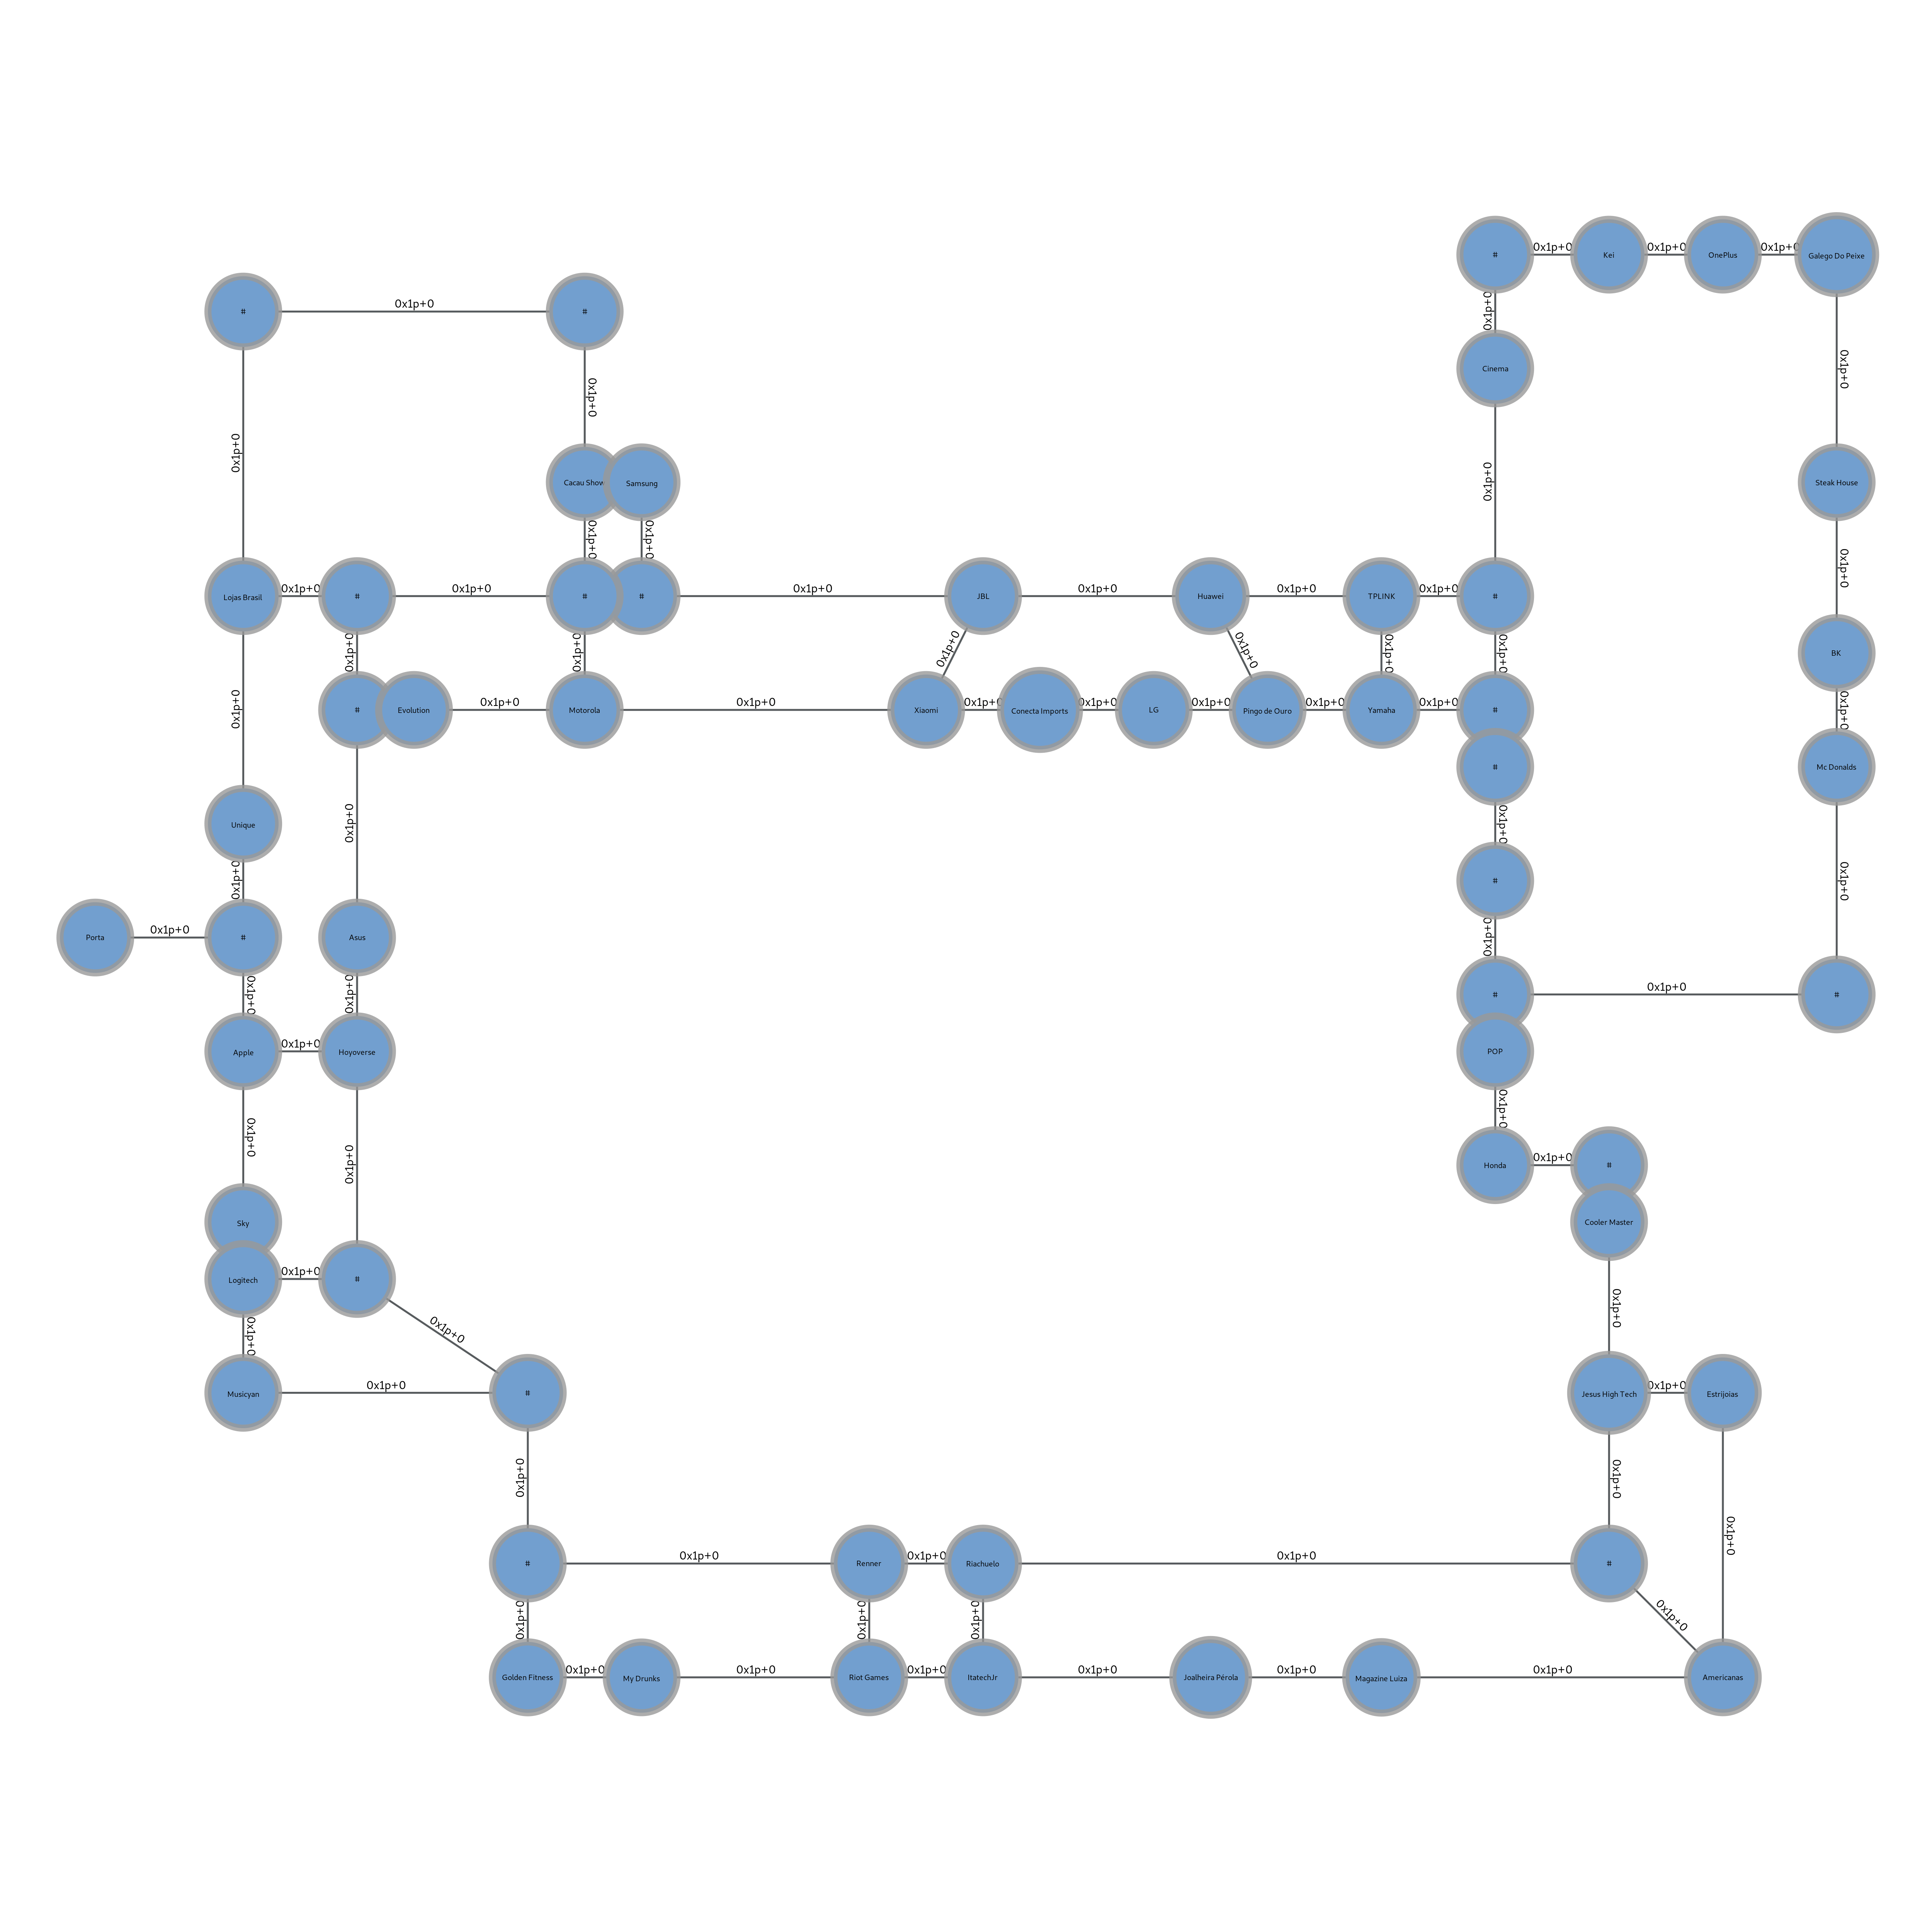

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fc089f57358, at 0x7fc089f52160>

In [38]:
import graph_tool.all as gt                       # Biblioteca para GRAFO
import csv                                        # Biblioteca para Leitura do csv

g = gt.Graph() 
g.set_directed(False)                             # criação do objeto
v_name = g.new_vertex_property("string")          # referenciação da lista v_name com uma nova propriedade (label) criada para o vértice - tipo string  
v_pos  = g.new_vertex_property("vector<double>")
e_distance = g.new_edge_property("string") 
e_weight = g.new_edge_property("float")  
e_action = g.new_edge_property("string") 

#Criação dos vértices no grafo à partir do arquivo .csv de vértices
f_network = open("vertices.csv", 'r', encoding='utf-8')
reader_network = csv.reader(f_network, delimiter=",")

vposX = []
vposY = []
for vertice in reader_network:
    v = g.add_vertex()
    v_name[v] = str(vertice[1]) # Adicionando nome do vertice
    vposX.append(vertice[5]) # Adicionando posição X
    vposY.append(vertice[6]) # Adicionando posição Y
f_network.close()

#Criação das arestas no grafo à partir do arquivo .cvs de arestas
f_network = open("arestas.csv", 'r', encoding='utf-8')
reader_network = csv.reader(f_network, delimiter=",")
for edge in reader_network:
    e = g.add_edge(int(edge[0]), int(edge[1]))
    e_weight[e] = float(edge[2])
    print("pesos")
    print(e_weight[e])
    e_distance[e] = str(edge[3])
   
f_network.close()

#print("lista de peso")
#for a in e_weight:
#    print(a)

#print(" > Lista de Transições: ",g.get_edges())


#Preenchendo as posições X e Y dos vértices
for v in g.vertices():
    v_pos[v] = (vposX[int(v)],vposY[int(v)])
    

gt.graph_draw(g, pos=v_pos, #pos=gt.arf_layout(visual_G),
               vertex_text= v_name,
               edge_text = e_weight,
               edge_pen_width = 5,  
               vertex_font_size=20,
               edge_font_size = 30,
               vertex_shape="circle",
               vertex_fill_color="#729fcf",
               output_size=(5000, 5000))
               #output="two-nodes.png")

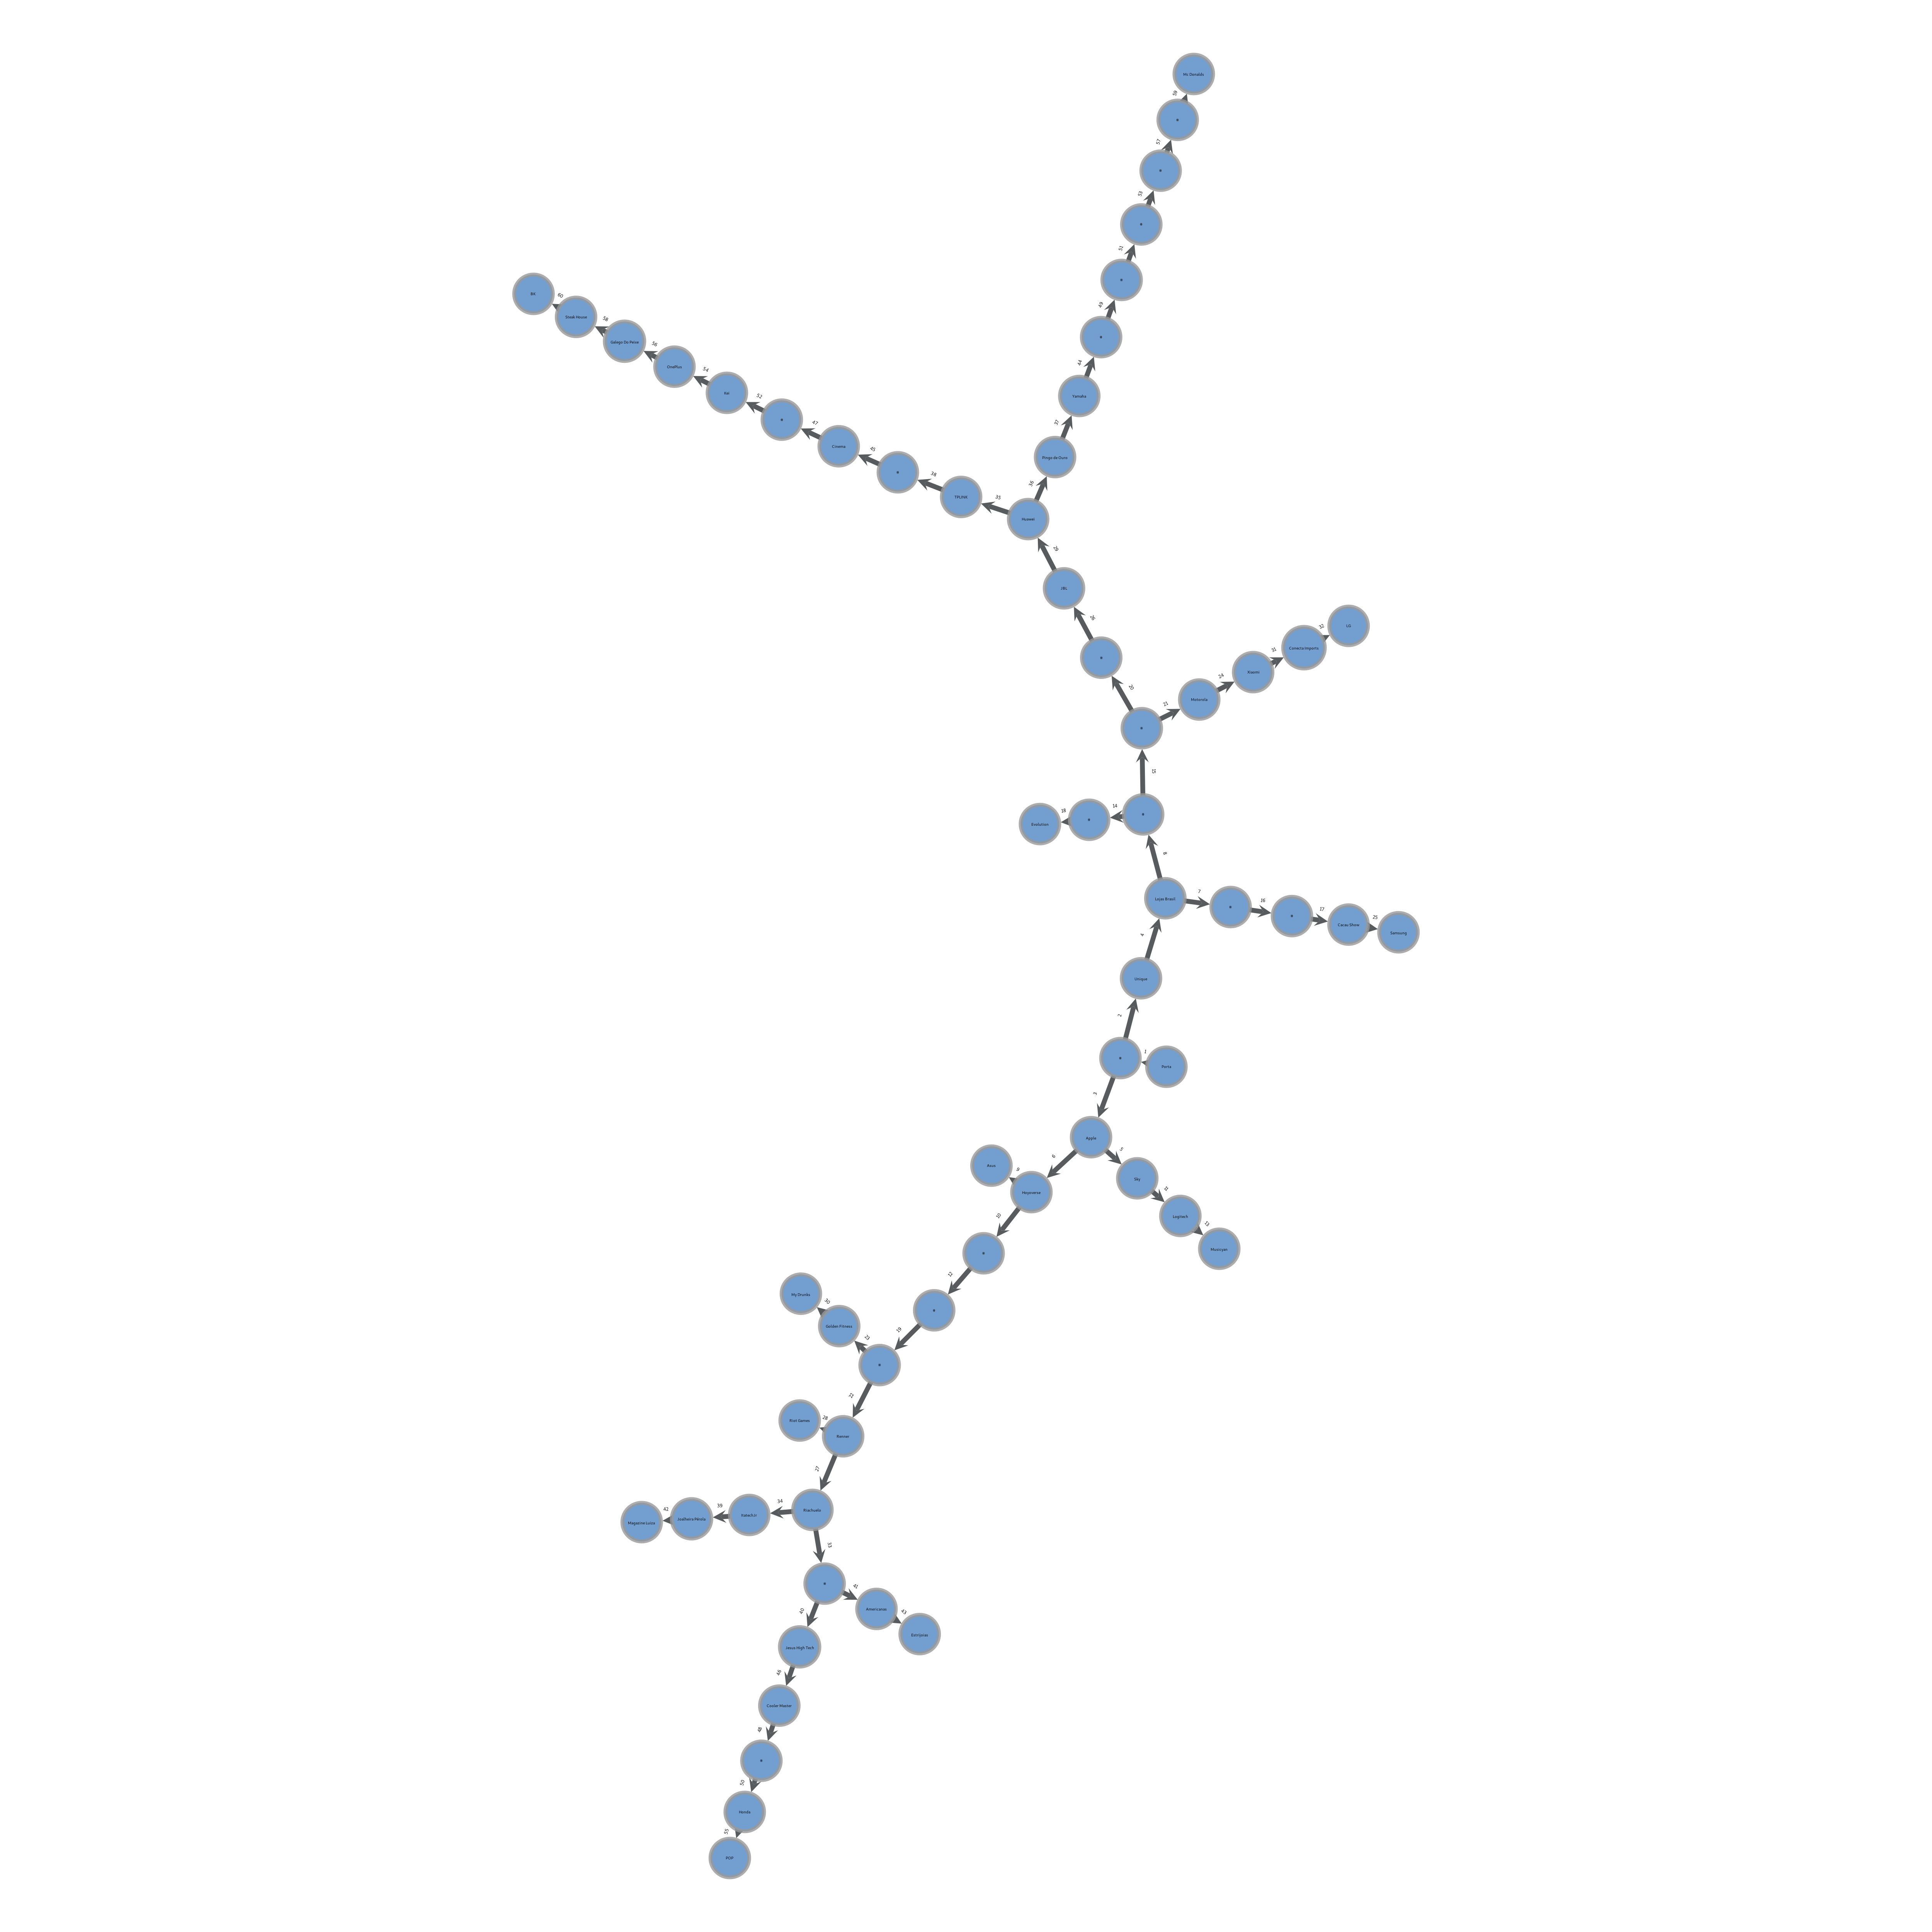

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fc089f522e8, at 0x7fc089f54c18>

In [39]:
import graph_tool.all as gt                           # Biblioteca para GRAFO
g_astar = gt.Graph()                                    # criação do objeto para busca em Largura
v_name_dfs = g_astar.new_vertex_property("string")      # referenciação da lista v_name com uma nova propriedade (label) criada para o vértice - tipo string 
e_ord = g_astar.new_edge_property("int")                # referenciação da lista e_ord com uma nova propriedade criada para a ordem de expansão - tipo int
e_action_bfs = g_astar.new_edge_property("string")
#def h(v):
#    return 
f_network = open("vertices.csv", 'r', encoding='utf-8')
reader_network = csv.reader(f_network, delimiter=",")
for vertice in reader_network:
    v = g_astar.add_vertex()
    v_name_dfs[v] = str(vertice[1])
f_network.close()

raiz = 'Porta'
index_raiz = list(v_name).index(raiz)
ord = 1

#print(index_raiz)
for edge in gt.astar_iterator(g, g.vertex(index_raiz), e_weight):
   #print(v_name[int(edge.source())], "->", v_name[int(edge.target())])
   e = g_astar.add_edge(int(edge.source()), int(edge.target()))
   e_ord[e] = ord
   e_action_bfs[e] = '(' + str(ord) + ') ' #+ e_action[g.edge(int(edge.source()), int(edge.target()))] 
   ord += 1


size = 5000
v_size = size / 50
e_pwidth = v_size / 8
gt.graph_draw(g_astar,#pos=gt.sfdp_layout(g_bfs),
              vertex_size = v_size,
              vertex_text= v_name_dfs,
              edge_text= e_ord,
              vertex_font_size=10,
              edge_font_size = 12,
              edge_pen_width = e_pwidth,
              vertex_shape="circle",
              vertex_fill_color="#729fcf",
              output_size=(size, size))
              #output="two-nodes.png")      
                                   


In [40]:
class VisitorExample(gt.AStarVisitor):                                            # É um objeto visitante que é chamado nos pontos de evento dentro do algoritmo bfs_search()
    def __init__(self, name, time, name_time, v_color, dist, pred, e_color, e_action, e_ord, target):
        self.name = name
        self.time = time
        self.name_time = name_time
        self.fill_color = v_color
        self.dist = dist
        self.pred = pred
        self.color = e_color
        self.e_action = e_action
        self.e_ord = e_ord
        self.e_count = 0
        self.last_time = 0
        self.target = target
        
    def discover_vertex(self, u):                                               # Invocado quando um vértice é encontrado pela primeira vez.
        self.name[u] = v_name[u]
        self.time[u] = self.last_time
        self.last_time += 1        
        self.name_time[u] = str(self.name[u]) + "(" + str(self.time[u]) + ")"
        print("-->", self.name[u], "foi encontrado e entrou na FILA") 
        self.fill_color[u] = "white"

    def examine_vertex(self, u):                                                # Invocado em um vértice à medida que é retirado da fila. 
        print("   ",self.name[u], "saiu da FILA e está sendo analisado (expandido)...") 

    def examine_edge(self, e):                                                  # Invocado em cada aresta de cada vértice depois de descoberto.
        print("    Aresta (%s, %s) em análise..." %               (v_name[e.source()], v_name[e.target()]))
        
    def edge_relaxed(self, e):                                                  #Após o exame do vértices, este método é invocado. 
        
        self.pred[e.target()] = int(e.source())                                 
        self.dist[e.target()] = self.dist[e.source()] + 1
        e = g_astar.add_edge(int(e.source()), int(e.target()))
        self.color[e] = "gray"
        self.e_action[e] = e_action[g.edge(int(e.source()), int(e.target()))]
        self.e_count += 1
        self.e_ord[e] = self.e_count
        print("    Após análise, aresta (%s, %s) mantida." %             (v_name[e.source()], v_name[e.target()]))
       
    def finish_vertex(self, u):
        print("    > Todos os vértices adjacentes à", self.name[u], "foram descobertos!\n") 


29
--> Porta foi encontrado e entrou na FILA
    Porta saiu da FILA e está sendo analisado (expandido)...
    Aresta (Porta, #) em análise...
    Após análise, aresta (Porta, #) mantida.
--> # foi encontrado e entrou na FILA
    > Todos os vértices adjacentes à Porta foram descobertos!

    # saiu da FILA e está sendo analisado (expandido)...
    Aresta (#, Unique) em análise...
    Após análise, aresta (#, Unique) mantida.
--> Unique foi encontrado e entrou na FILA
    Aresta (#, Apple) em análise...
    Após análise, aresta (#, Apple) mantida.
--> Apple foi encontrado e entrou na FILA
    Aresta (#, Porta) em análise...
    > Todos os vértices adjacentes à # foram descobertos!

    Unique saiu da FILA e está sendo analisado (expandido)...
    Aresta (Unique, Lojas Brasil) em análise...
    Após análise, aresta (Unique, Lojas Brasil) mantida.
--> Lojas Brasil foi encontrado e entrou na FILA
    Aresta (Unique, #) em análise...
    > Todos os vértices adjacentes à Unique foram descober

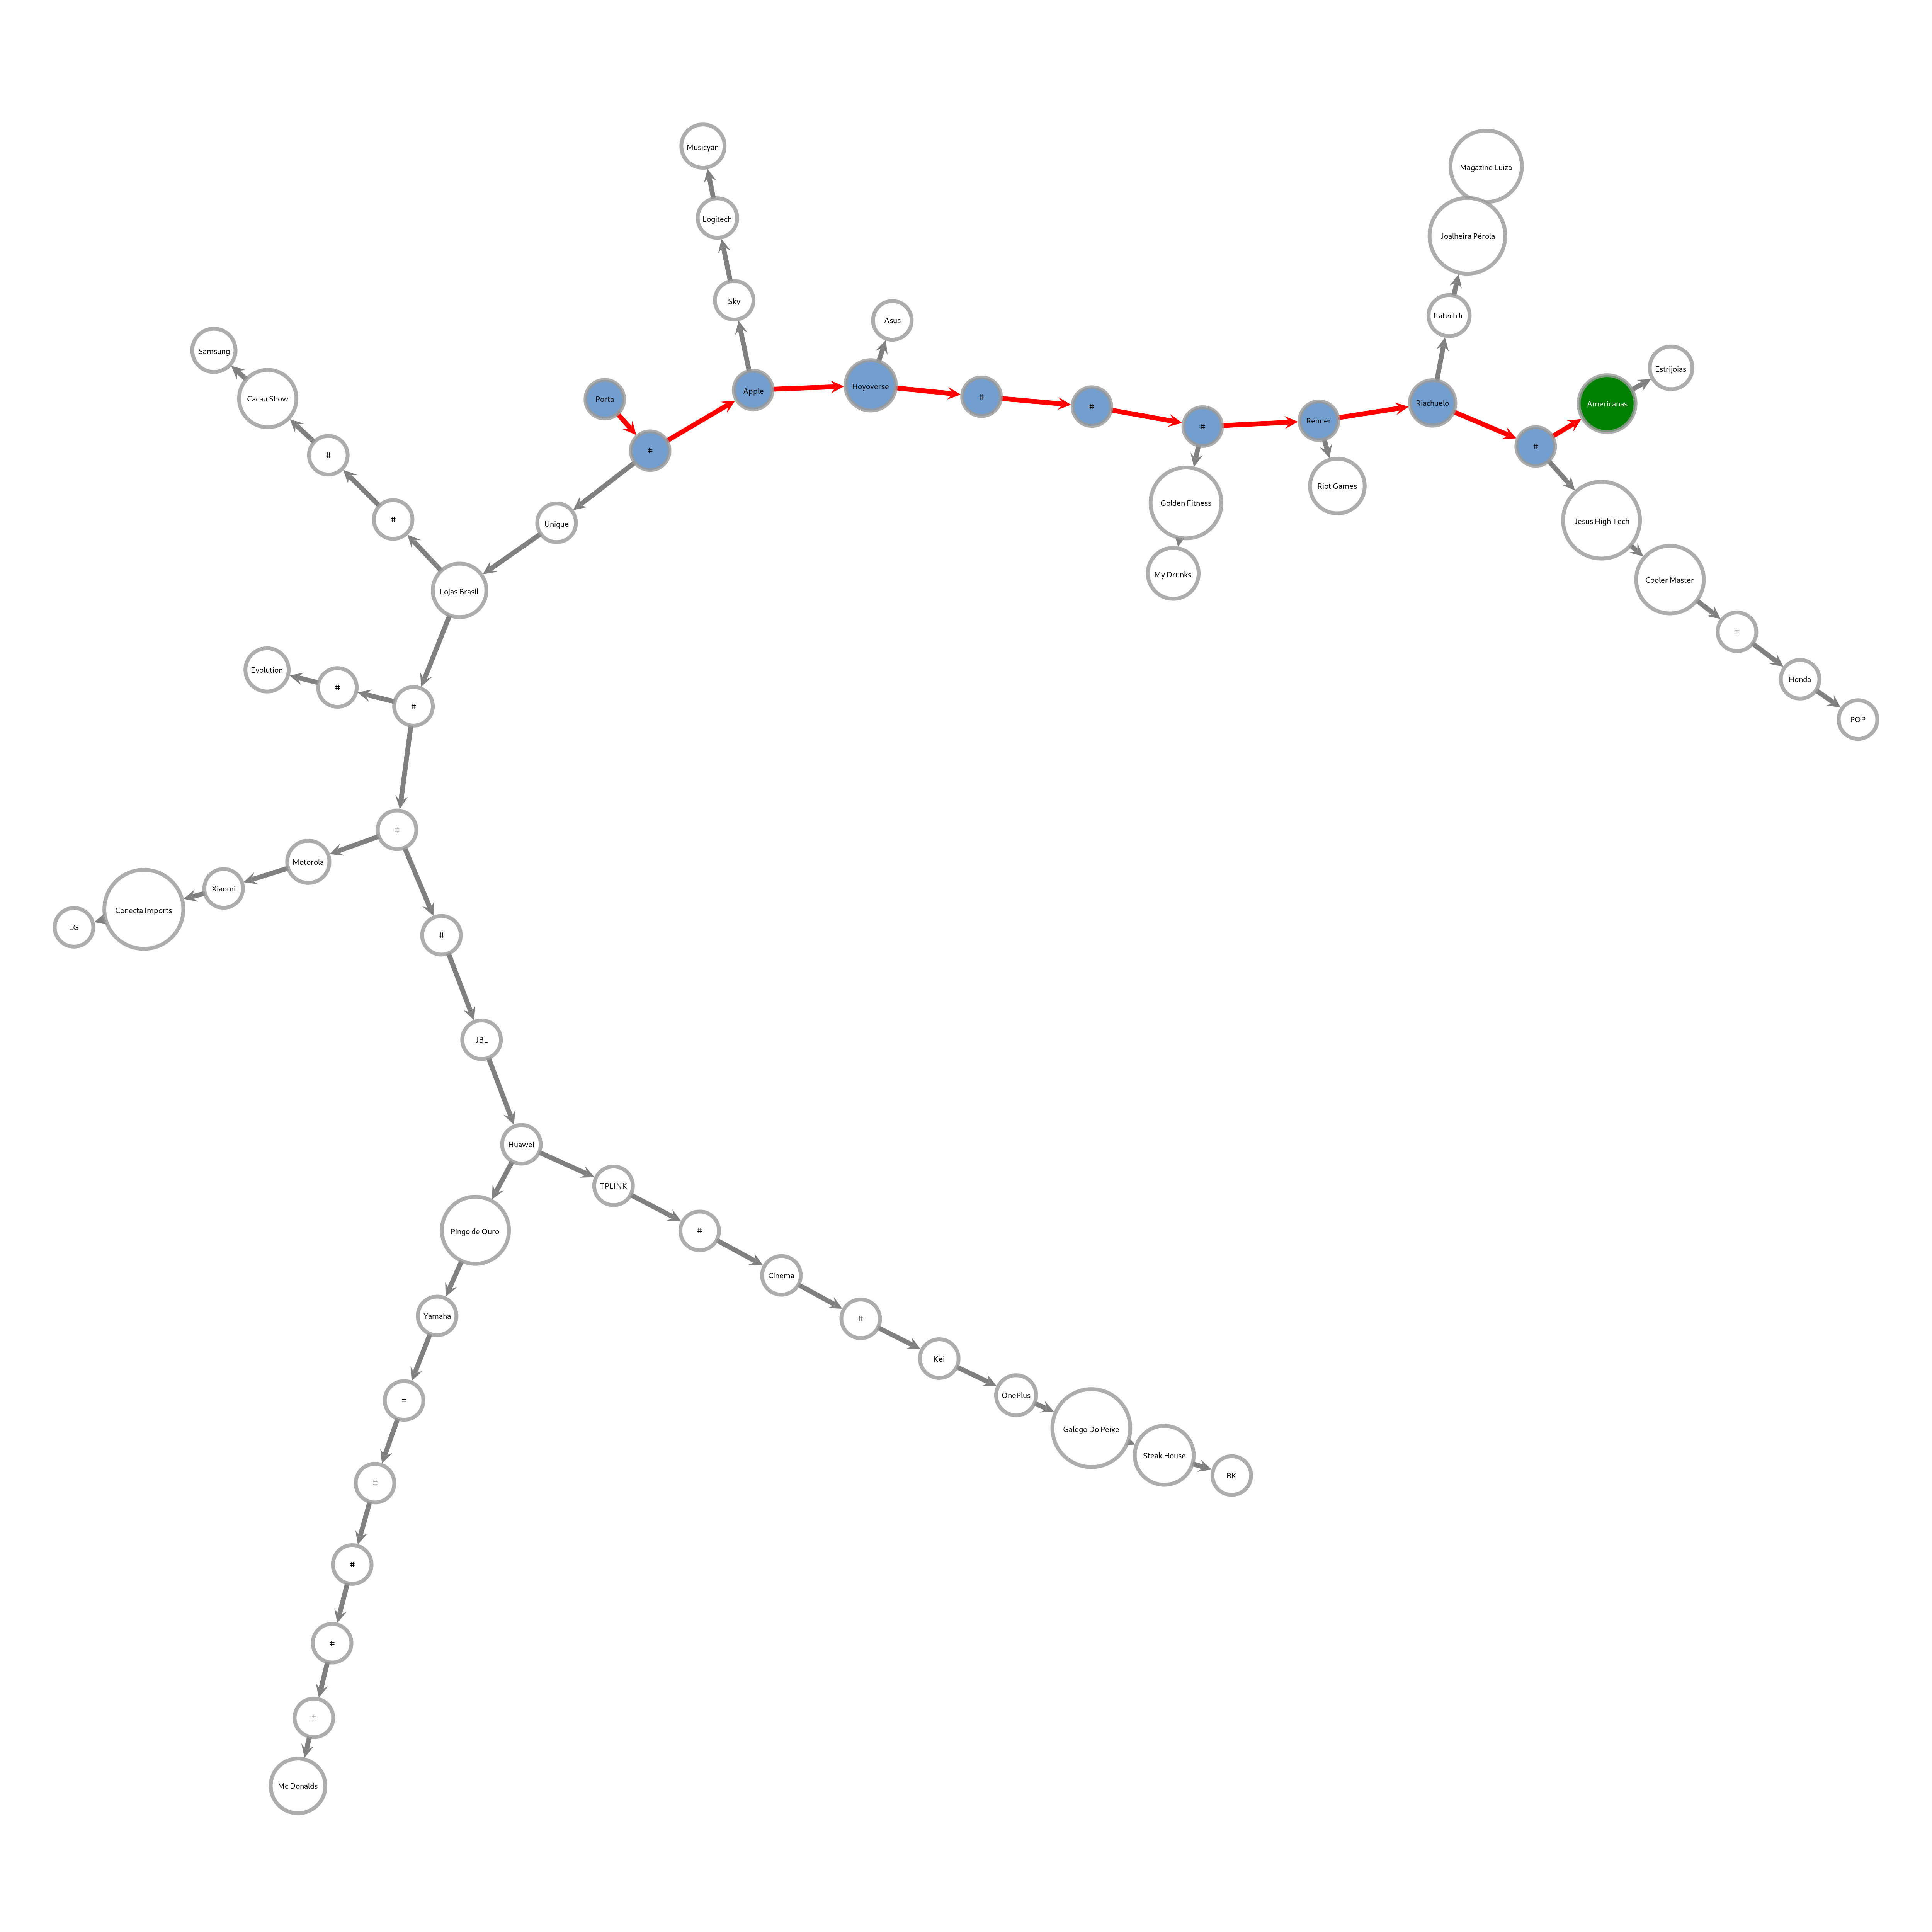

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fc08bc38f60, at 0x7fc089f78ef0>

In [41]:
import graph_tool.all as gt  

g_astar = gt.Graph()                                      # criação do objeto para busca A Estrela
bfsv_name = g_astar.new_vertex_property("string")      # referenciação da lista v_name_bfs com uma nova propriedade do vértice para o nome - tipo string 
bfsv_time = g_astar.new_vertex_property("int")         # referenciação da lista v_time com uma nova propriedade do vértice para a ordem de expansão - tipo int
bfsv_name_time = g_astar.new_vertex_property("string")      # referenciação da lista v_name_time com uma nova propriedade do vértice para o nome e ordem de expansão - tipo string
bfsv_color = g_astar.new_vertex_property("string")      # referenciação da lista v_color com uma nova propriedade do vértice para a cor - tipo string  
bfsv_dist = g_astar.new_vertex_property("int")         # referenciação da lista v_dist como uma propriedade do vértice criada para a distância da raiz
bfsv_pred = g_astar.new_vertex_property("int64_t")     # referenciação da lista v_pred como uma propriedade do vértice para referenciar o predecessor (pai)
bfse_color = g_astar.new_edge_property("string")        # referenciação da lista e_color com uma nova propriedade da aresta para a cor - tipo string  
bfse_action = g_astar.new_edge_property("string")        # referenciação da lista e_action_bfs com uma nova propriedade da aresta para a ação - tipo string
bfse_ord = g_astar.new_edge_property("string")        # referenciação da lista e_action_bfs com uma nova propriedade da aresta para a ação - tipo string
bfse_weight_bfs = g_astar.new_edge_property("float")       # referenciação da lista e_weight com uma nova propriedade criada para a função g(n) - tipo float

raiz = 'Porta'
alvo = 'Americanas'
index_raiz = list(v_name).index(raiz)
index_alvo = list(v_name).index(alvo) 

print(list(v_name).index(alvo))
gt.astar_search(g, g.vertex(index_raiz), e_weight, VisitorExample(bfsv_name, bfsv_time, bfsv_name_time, bfsv_color, 
                                    bfsv_dist, bfsv_pred, bfse_color, bfse_action, bfse_ord, g.vertex(index_alvo)))

#print(list(bfsv_name).index(alvo))
print(list(bfsv_name)) #nao ta retornando para a lista
bfsv_color[index_alvo] = "green"
path = []

while index_alvo != index_raiz:
  e = g_astar.edge(bfsv_pred[index_alvo], index_alvo)
  if e is None:
    break;
  bfse_color[e] = "red"
  index_alvo = bfsv_pred[index_alvo]
  path.insert(0,bfsv_name[index_alvo])
  bfsv_color[index_alvo] = "#729fcf"
size = 5000
v_size = size / 50
e_pwidth = v_size / 8
gt.graph_draw(g_astar, #pos=gt.sfdp_layout(g_bfs),
              vertex_size = v_size,
              vertex_text= bfsv_name,
              edge_color= bfse_color,
              vertex_font_size=20,
              edge_font_size = 8,
              edge_pen_width = e_pwidth,
              vertex_fill_color=bfsv_color,              
              vertex_shape="circle",
              #vertex_fill_color="#729fcf",
              output_size=(size, size)) 